# Supervised Learning 



## Linear Regression on House Price Prediction Dataset

![](https://lc.zoocdn.com/9f2d741927ffa878efa9a4ffa181dfcb119f7fc3.jpg)

### Installing Packages

In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from pandas import set_option
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 10]

In [ ]:
!wget -N https://www.dropbox.com/s/3pzyqphvbp6xa5e/housing.csv

--2022-01-20 10:53:01--  https://www.dropbox.com/s/3pzyqphvbp6xa5e/housing.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3pzyqphvbp6xa5e/housing.csv [following]
--2022-01-20 10:53:02--  https://www.dropbox.com/s/raw/3pzyqphvbp6xa5e/housing.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc693bb7df818190f882b2e7b970.dl.dropboxusercontent.com/cd/0/inline/BeKduXzyppGZJuH-gRdEbJU5Ie3JXlKLEFWpmJBPd7GifPP7oOYXsuCdEfAXC9Nv1wH8rOEfJ24tpX02q-6JEDeV4QthF_7gBWMldpgcbly88pIlFWEnxZJySyI3M8FaG20SzgM9dcCETk5By-r2i2AO/file# [following]
--2022-01-20 10:53:02--  https://uc693bb7df818190f882b2e7b970.dl.dropboxusercontent.com/cd/0/inline/BeKduXzyppGZJuH-gRdEbJU5Ie3JXlKLEFWpmJBPd7GifPP7oOYXsuCdEfAXC9Nv1wH8rOEfJ24tpX02q-6JEDeV4Qth

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
bos1 = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

![](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

Boston House Price dataset has 14 features and their description is given as follows:

- CRIM per capita crime rate by town

- ZN proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS proportion of non-retail business acres per town

- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

- NOX nitric oxides concentration (parts per 10 million)

- RM average number of rooms per dwelling

- AGE proportion of owner-occupied units built prior to 1940

- DIS weighted distances to five Boston employment centres

- RAD index of accessibility to radial highways

- TAX full-value property-tax rate per dollar 10,000.

- PTRATIO pupil-teacher ratio by town

- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- LSTAT % lower status of the population

- MEDV Median value of owner-occupied homes in $1000's


In [ ]:
# data frame with first 5 rows (by default)
bos1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# dimension
bos1.shape

(506, 14)

In [ ]:
set_option('precision', 1)
bos1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.1e+02,506.0,506.0,5.1e+02,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6e+00,11.4,11.1,6.9e-02,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6e+00,23.3,6.9,2.5e-01,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,6.3e-03,0.0,0.5,0.0e+00,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,8.2e-02,0.0,5.2,0.0e+00,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0
50%,2.6e-01,0.0,9.7,0.0e+00,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2
75%,3.7e+00,12.5,18.1,0.0e+00,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,8.9e+01,100.0,27.7,1.0e+00,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


In [ ]:
# correlation
set_option('precision', 2)
bos1.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


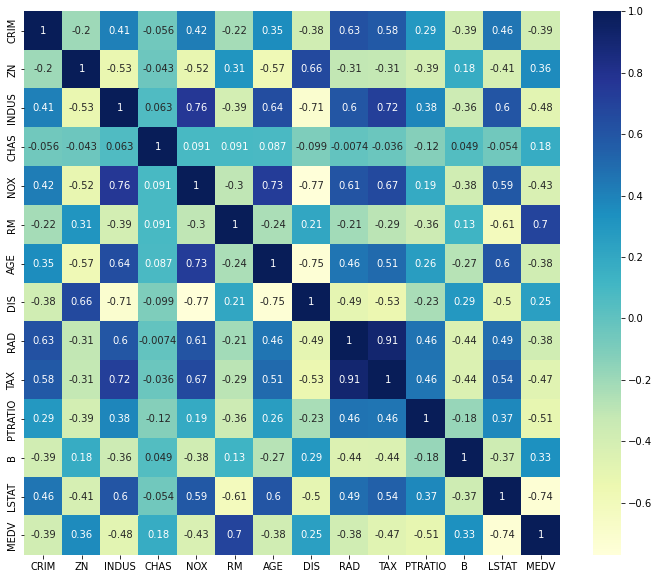

In [ ]:
plt.figure(figsize=(12,10))
cor = bos1.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["MEDV"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.70
PTRATIO    0.51
LSTAT      0.74
MEDV       1.00
Name: MEDV, dtype: float64

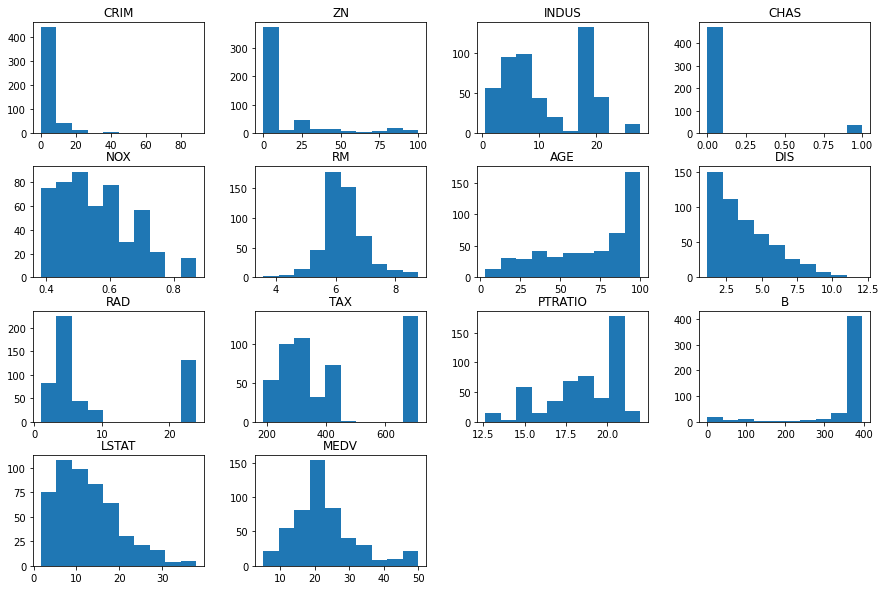

In [ ]:
# Data visualizations

# histograms
bos1.hist(bins=10,figsize=(15,10),grid=False);

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
[ 5.20765239  2.21906306  0.29414628  3.39579929  0.72714416  0.40241467
 -0.59718559  1.00877876  1.00183349  0.66796827 -0.79994453 -2.88179835
  0.90377074  1.10481082]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


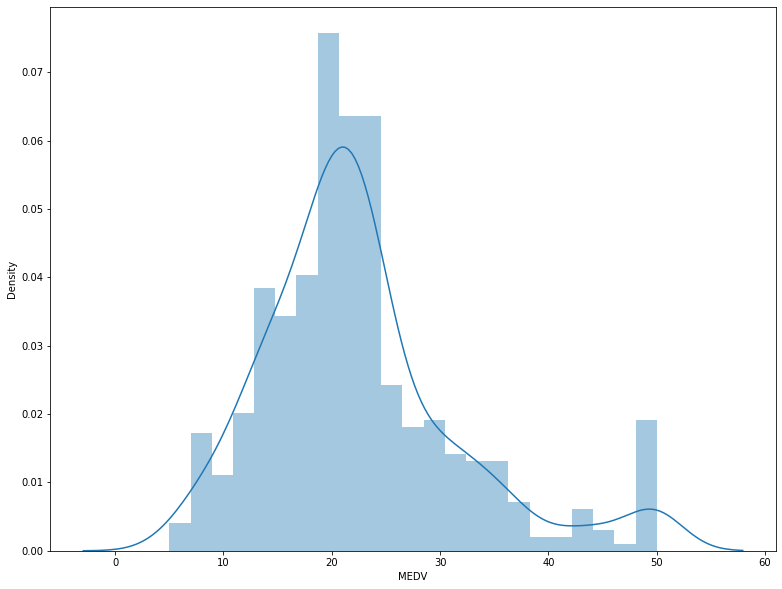

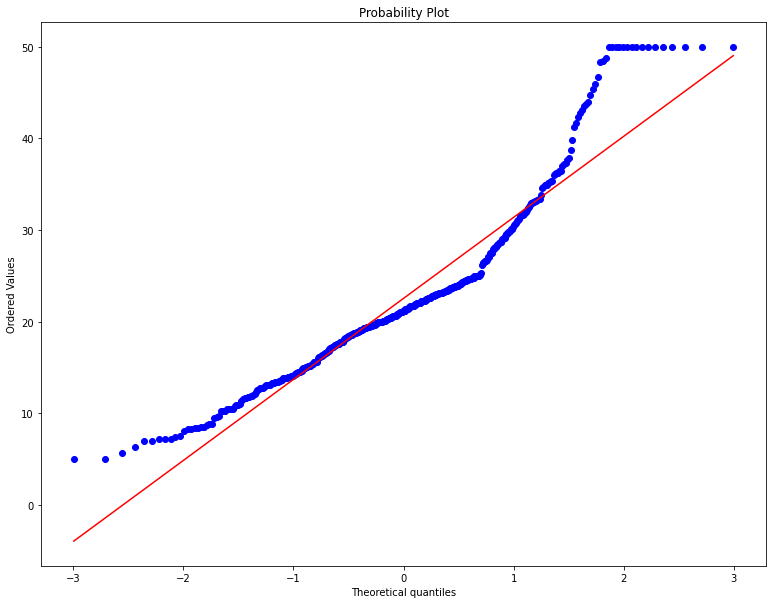

In [ ]:
from scipy import stats
#histogram and normal probability plot
print( bos1.columns )
print( stats.skew(bos1) )

sns.distplot(bos1['MEDV'], hist=True);
fig = plt.figure()
res = stats.probplot(bos1['MEDV'], plot=plt)

### Simple Linear Regression 

It just uses one variable to explain the predicted values.
 In this case, Price = Coff_RM(RM) + y_intercept

In [ ]:
# variable selection
x = bos1.drop(columns=['MEDV'])
x = x[['RM']]
y = bos1["MEDV"]
print(x.shape)
print(y.shape)

(506, 1)
(506,)


In [ ]:
from sklearn.model_selection import train_test_split
#testing data size is of 33% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.33, random_state=5)

In [ ]:
from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [ ]:
print(x.columns)
print(model.intercept_)
print(model.coef_)

Index(['RM'], dtype='object')
-32.59974232819911
[8.76572231]


In [ ]:
y_pred = model.predict(x_test)

Text(0, 0.5, 'Predicted Y')

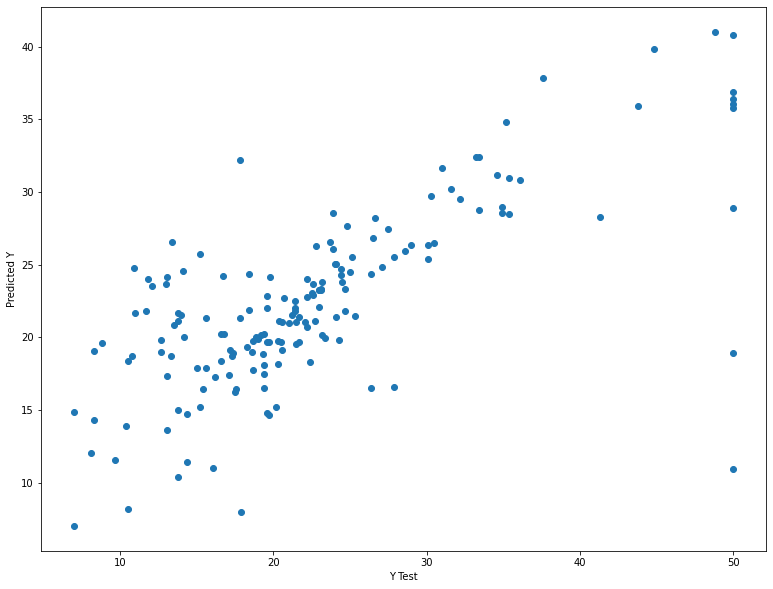

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
# calculate MSE
import math
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("MSE",math.sqrt(mse))
print("y_test mean", y_test.mean())

# R^2
print("R^2",model.score(x_test,y_test))

MSE 6.789141476418063
y_test mean 22.52395209580839
R^2 0.5083150699355135


In [ ]:
pd.DataFrame({"Actual": y_test, "Predict": y_pred})

,Actual,Predict
226,37.6,37.88
292,27.9,25.52
90,22.6,23.65
373,13.8,10.40
273,35.2,34.82
...,...,...
48,14.4,14.73
281,35.4,28.48
42,25.3,21.48
115,18.3,19.36


### Multiple Linear Regression

In [ ]:
x_1 = bos1.drop(columns=['MEDV'])
x_mul = x_1[['RM', 'PTRATIO', 'LSTAT']]
y = bos1["MEDV"]
print(x_mul.shape)
print(y.shape)

(506, 3)
(506,)


In [ ]:
from sklearn.model_selection import train_test_split
#testing data size is of 33% of entire data
x_train_mul, x_test_mul, y_train, y_test =train_test_split(x_mul,y, test_size=0.33, random_state=5)

In [ ]:
from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression()
model_mul = lm.fit(x_train_mul,y_train)

In [ ]:
print(x_mul.columns)
print(model_mul.intercept_)
print(model_mul.coef_)

Index(['RM', 'PTRATIO', 'LSTAT'], dtype='object')
22.92911957430603
[ 4.21798734 -1.07042016 -0.57236016]


In [ ]:
y_pred_mul = model_mul.predict(x_test_mul)
pd.DataFrame({"Actual": y_test, "Predict": y_pred_mul}).head()

,Actual,Predict
226,37.6,36.42
292,27.9,27.65
90,22.6,25.90
373,13.8,2.10
273,35.2,31.69


Text(0, 0.5, 'Predicted Y Multiple Regression')

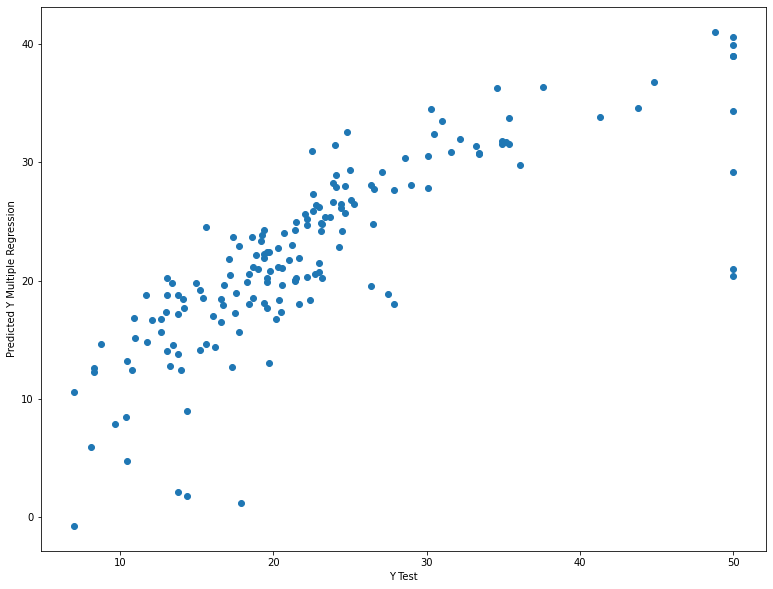

In [ ]:
plt.scatter(y_test,y_pred_mul)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y Multiple Regression')

In [ ]:
# calculate MSE
import math
import sklearn
mse_mul = sklearn.metrics.mean_squared_error(y_test, y_pred_mul)
print("MSE",math.sqrt(mse_mul))
print("y_test mean", y_test.mean())

# R^2
print("R^2",model_mul.score(x_test_mul,y_test))

MSE 5.811329091763358
y_test mean 22.52395209580839
R^2 0.6397465739421644


In [ ]:
pd.DataFrame({"Actual": y_test, "Predict": y_pred_mul})

,Actual,Predict
226,37.6,36.42
292,27.9,27.65
90,22.6,25.90
373,13.8,2.10
273,35.2,31.69
...,...,...
48,14.4,8.91
281,35.4,33.74
42,25.3,26.46
115,18.3,19.86


## Decision Tree on Click Through Dataset

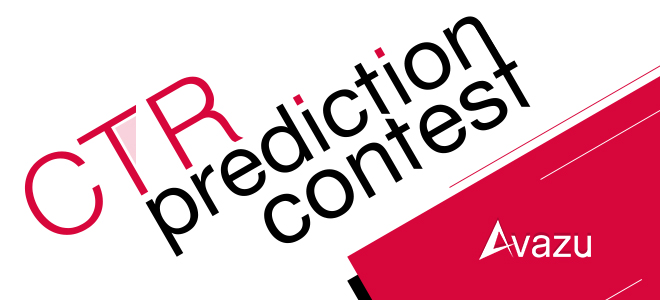

In [ ]:
!pip install --upgrade scikit-learn==0.20.3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import os
import pydotplus
import graphviz

In [ ]:
!gdown https://drive.google.com/uc?id=1RNhrd-Af95rnmZgd0jU_AfHm2qWUoKOX

Downloading...
From: https://drive.google.com/uc?id=1RNhrd-Af95rnmZgd0jU_AfHm2qWUoKOX
To: /content/small_train_10000.csv
100% 1.62M/1.62M [00:00<00:00, 7.56MB/s]


In [ ]:
df = pd.read_csv('small_train_10000.csv')
df = df[:10000]

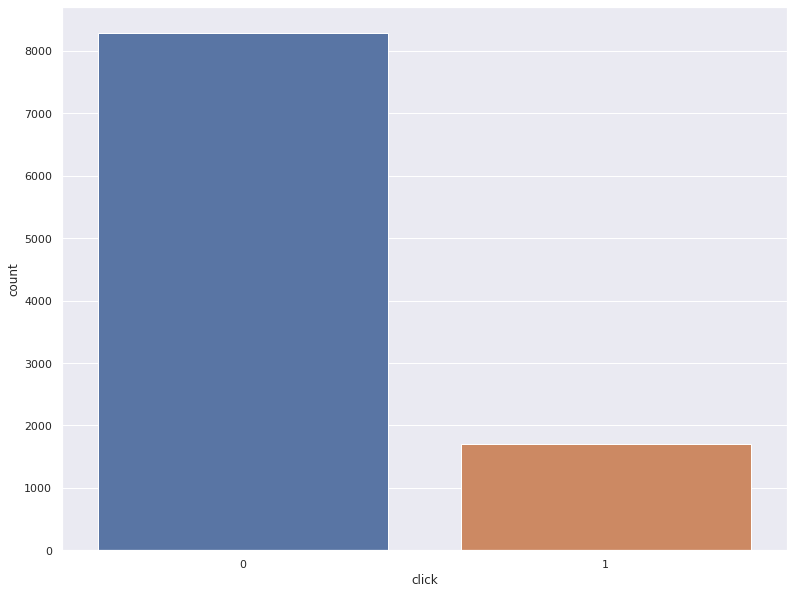

In [ ]:
sns.countplot(x='click',data=df)

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'click', 'hour', 'C1', 'banner_pos', 'site_id',
       'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category',
       'device_id', 'device_ip', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21'],
      dtype='object')

In [ ]:
df.isnull().sum().sort_values(ascending=False)

C21                 0
app_category        0
id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
device_id           0
C20                 0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
Unnamed: 0          0
dtype: int64

In [ ]:
df_tree = df_tree = pd.get_dummies(df,drop_first=True)
df_tree.head()

,Unnamed: 0,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,site_id_02d5151c,site_id_02fb33fd,site_id_030440fe,site_id_0338ff60,site_id_03cecb5d,site_id_04773863,site_id_066a0884,site_id_06a0ac14,site_id_070ca277,site_id_081cfb60,site_id_09c3b4c1,site_id_0a647e36,site_id_0a742914,site_id_0aab7161,site_id_0c2fe9d6,site_id_0d0207b0,site_id_0eb72673,site_id_0f30aed6,site_id_10a74e5b,site_id_11944c42,site_id_12fb4121,site_id_13b31263,site_id_147fe840,site_id_14c5faa4,...,device_model_f9315725,device_model_f972d6dc,device_model_f9ba9057,device_model_fa1af2c1,device_model_fa202956,device_model_fa340a73,device_model_fa374547,device_model_fa61e8fe,device_model_fa952a77,device_model_fac99459,device_model_fae6e11e,device_model_fb007d6f,device_model_fb4b1e46,device_model_fba336ea,device_model_fba60933,device_model_fbc27727,device_model_fbec56bc,device_model_fc7c329c,device_model_fc9d9423,device_model_fce66524,device_model_fd10e5c6,device_model_fd1a48c2,device_model_fd1ab1f0,device_model_fd235d3a,device_model_fd621b1f,device_model_fda40691,device_model_fdd77cb5,device_model_fdd86e39,device_model_fdfa8fcd,device_model_fe18eef5,device_model_fe304337,device_model_fe31adef,device_model_feacaaee,device_model_feb70d53,device_model_ff065cf0,device_model_ff16d623,device_model_ff2a3543,device_model_ff717dd1,device_model_ffcd1497,device_model_ffe69079
0,789,1.01e+19,0,14102100,1005,0,1,0,16920,320,50,1899,0,431,100077,117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1987,1.03e+19,1,14102100,1005,0,1,0,18095,320,50,2060,3,39,100050,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7175,1.10e+19,0,14102100,1005,0,1,0,15701,320,50,1722,0,35,100084,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1645,1.02e+19,0,14102100,1005,0,1,0,15704,320,50,1722,0,35,-1,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6620,1.09e+19,0,14102100,1005,0,1,0,15705,320,50,1722,0,35,-1,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# To split dataset into Train 60% Val 20% Test 20%

x_tree = df_tree.drop("click", axis=1)
y_tree = df_tree.click
x_tree = df_tree.drop("click", axis=1)
y_tree = df_tree.click
x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(x_tree, y_tree,
                                                                        test_size=0.2, random_state=123)

x_train_tree, x_val_tree, y_train_tree, y_val_tree = train_test_split(x_train_tree, y_train_tree, 
                                                                      test_size=0.25, random_state=123) # 0.25 x 0.8 = 0.2

In [ ]:
print(x_train_tree.shape, x_test_tree.shape, x_val_tree.shape)

(6000, 10621) (2000, 10621) (2000, 10621)


In [ ]:
parameters = {'max_depth':[5, 10]}
decision_tree = DecisionTreeClassifier(criterion= 'entropy')
decision_tree = decision_tree.fit(x_train_tree, y_train_tree)
grid_search_dt = GridSearchCV(decision_tree, parameters)
grid_search_dt.fit(x_val_tree, y_val_tree)
print(grid_search_dt.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 5}


In [ ]:
decision_tree = DecisionTreeClassifier(max_depth = 5, criterion= 'entropy')
decision_tree = decision_tree.fit(x_train_tree, y_train_tree)

In [ ]:
y_tree_pred = decision_tree.predict(x_test_tree) # predict class
y_tree_prob = decision_tree.predict_proba(x_test_tree) #predict prob

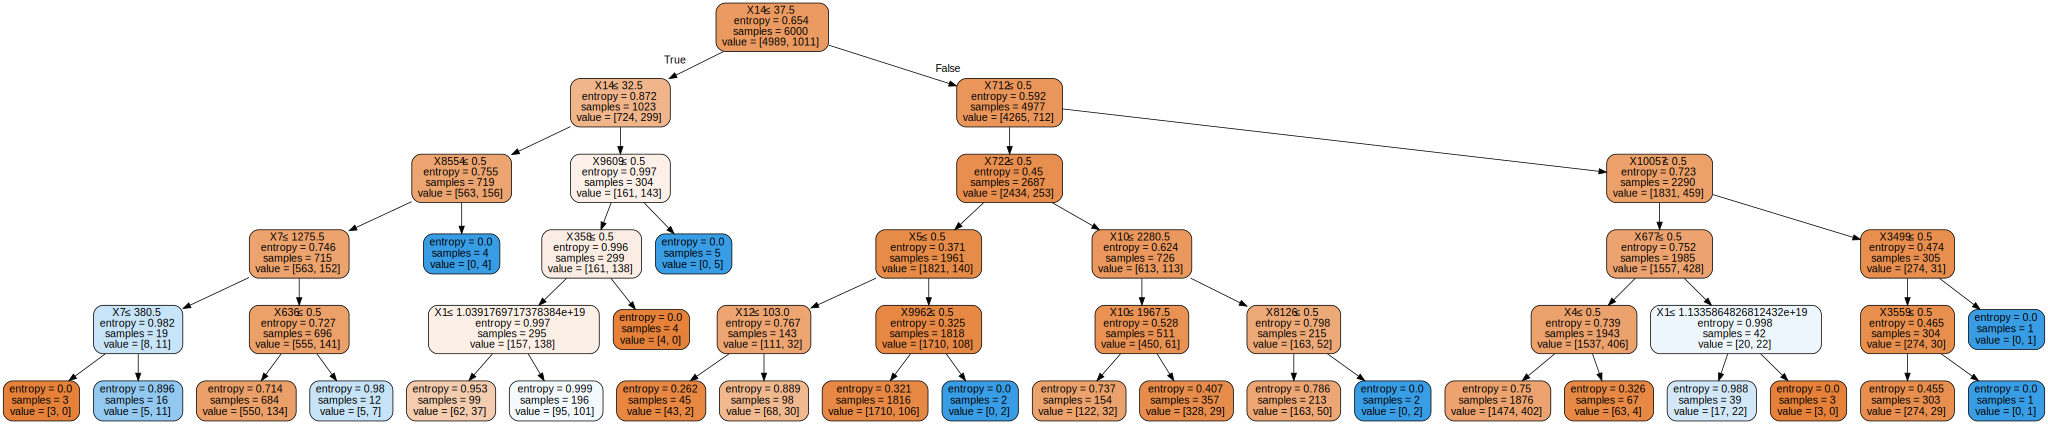

In [ ]:
# Visualize DT

dot_data_dt = export_graphviz(decision_tree, out_file=None,
                          filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data_dt)
graph

In [ ]:
print(classification_report(y_test_tree, y_tree_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1641
           1       0.55      0.10      0.17       359

   micro avg       0.82      0.82      0.82      2000
   macro avg       0.69      0.54      0.54      2000
weighted avg       0.78      0.82      0.77      2000



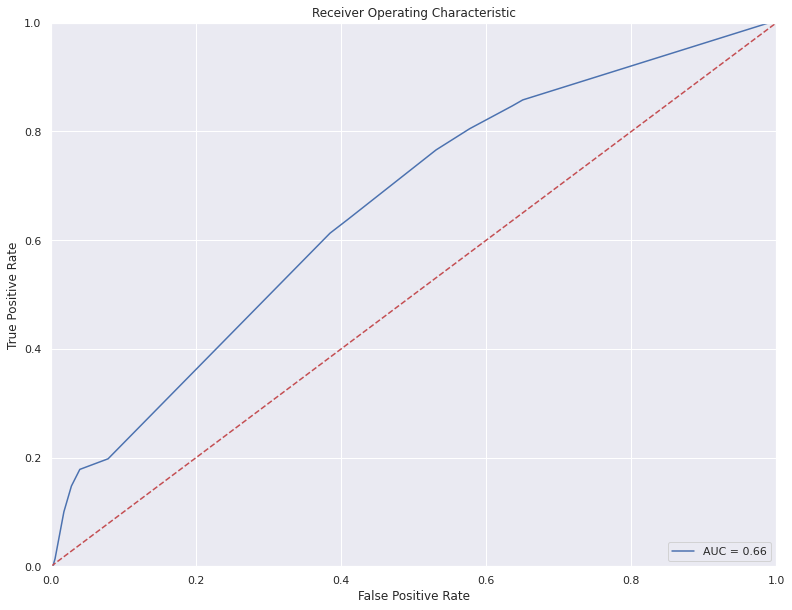

In [ ]:
# TO DO ROC Curve

preds_tree = y_tree_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_tree, preds_tree)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()